In [1]:
import sys
sys.path.append("../..")
from tools.tools import rect_to_cyl
import pylab as plt
import numpy as np
from galpy.potential import MWPotential2014
from galpy.df import quasiisothermaldf
from galpy.actionAngle import actionAngleAdiabatic
aA= actionAngleAdiabatic(pot=MWPotential2014,c=True)
# set up qdf
# qdf not imported from galpy since I am running a modified galpy in console
qdf= quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aA,cutcounter=True)

The following plot is epsilon = 0.5, 1.7 million stars, without selection.

Populating the interactive namespace from numpy and matplotlib


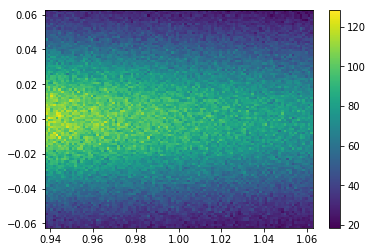

In [5]:
qdf_sample = np.load('data/qdf sample cartesian physical, date=(2018, 8, 10).npy')
R, vR, vT, z, vz, phi = rect_to_cyl(*qdf_sample.T).T
%pylab inline
hist_sample = plt.hist2d(R/8.,z/8., bins = 100, normed = True)
plt.colorbar()
plt.savefig("qdf sample density.png")

The theoretical density plot in R-z space

In [6]:
R_linspace = np.linspace(7.5/8., 8.5/8., 40)
z_linspace = np.linspace(-0.5/8., 0.5/8., 40)
Rv, zv = np.meshgrid(R_linspace, z_linspace)
density = qdf.density(Rv, zv)

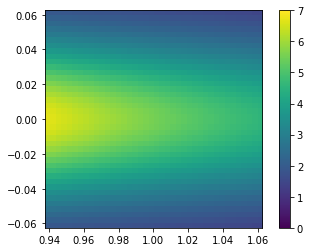

In [7]:
plt.imshow(density, extent = (np.min(R_linspace), np.max(R_linspace),np.min(z_linspace), np.max(z_linspace)), 
           vmin = 0.0, vmax = 7)
plt.colorbar()
plt.savefig("theoretical qdf density.png")

In [8]:
(np.min(z)/8., np.max(z)/8.)

(-0.062499903538416, 0.06249983813398166)

The following plot is for the sample with old selection. It is correct because they get more sparse away from the sun.

Populating the interactive namespace from numpy and matplotlib


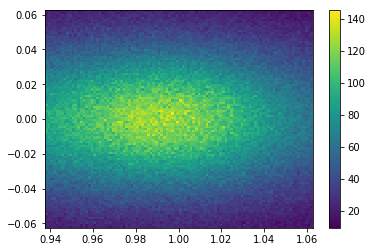

In [9]:
qdf_sample = np.load('data/qdf sample cartesian physical with selection, date=(2018, 8, 13).npy')
R, vR, vT, z, vz, phi = rect_to_cyl(*qdf_sample.T).T
%pylab inline
hist_sample = plt.hist2d(R/8.,z/8., bins = 100, normed = True)
plt.colorbar()
plt.savefig("qdf sample with selection density.png")

The following plot is with epsilon = 1, 3.1 mllion stars, with new selection.

Populating the interactive namespace from numpy and matplotlib
c:\users\user\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



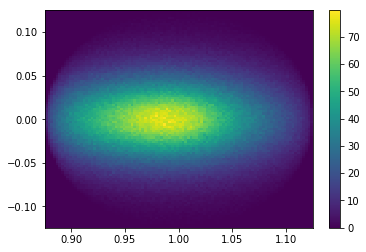

In [2]:
qdf_sample = np.load('data/qdf sample cartesian physical with new selection, e=1, date=(2018, 8, 20).npy')
R, vR, vT, z, vz, phi = rect_to_cyl(*qdf_sample.T).T
%pylab inline
hist_sample = plt.hist2d(R/8.,z/8., bins = 100, normed = True)
plt.colorbar()
plt.savefig("qdf sample density, e=1, new selection.png")